<a id = '2' ></a>
## Data Content
* The happiness scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.
* **Ladder score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia:** It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation, writers

import seaborn as sns
sns.set_style("whitegrid")

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

In [105]:
#import dataset
df=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df1=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [106]:
df.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [108]:
#check miss value
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [109]:
#getting descriptive statistics summary
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [111]:
df['Country name'].value_counts() 
#it's unique 

Finland         1
Ghana           1
Turkmenistan    1
Gambia          1
Benin           1
               ..
Latvia          1
Colombia        1
Hungary         1
Thailand        1
Afghanistan     1
Name: Country name, Length: 149, dtype: int64

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

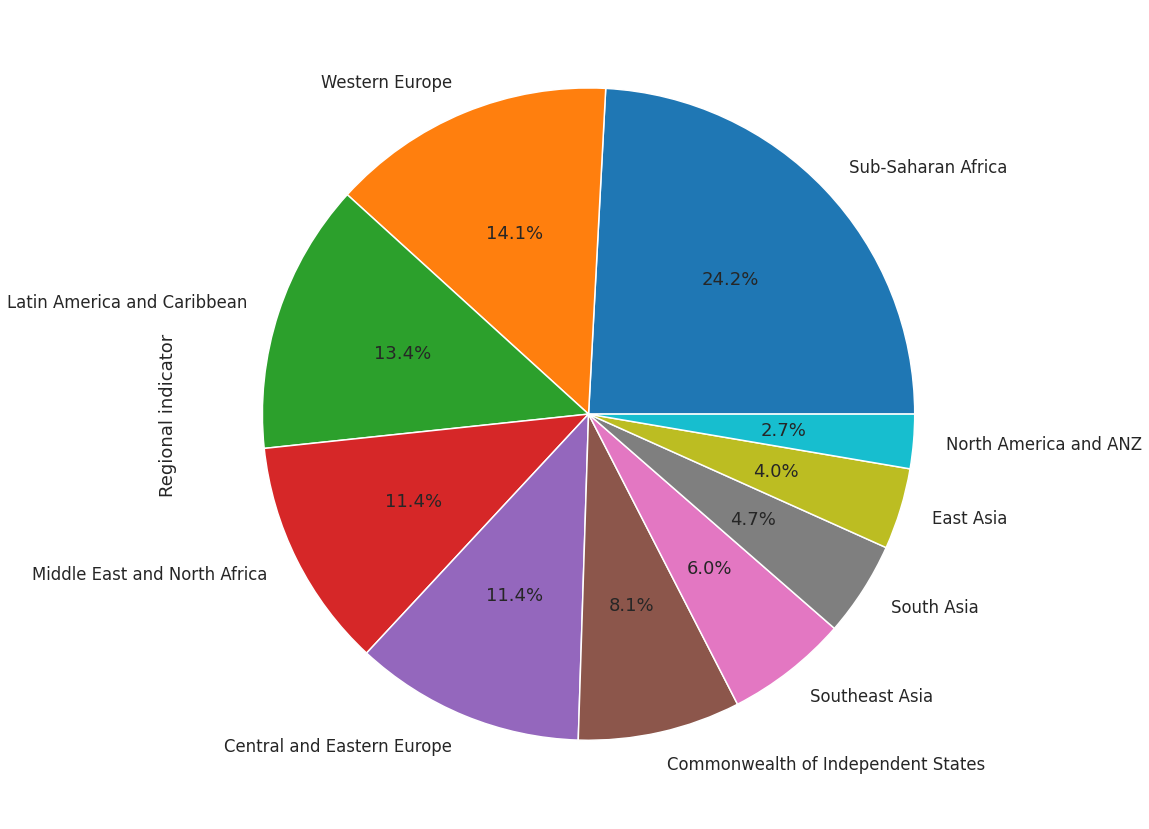

In [164]:
plt.figure(figsize = (20,15))
df['Regional indicator'].value_counts().plot(kind='pie',autopct='%1.1f%%');
df['Regional indicator'].value_counts()

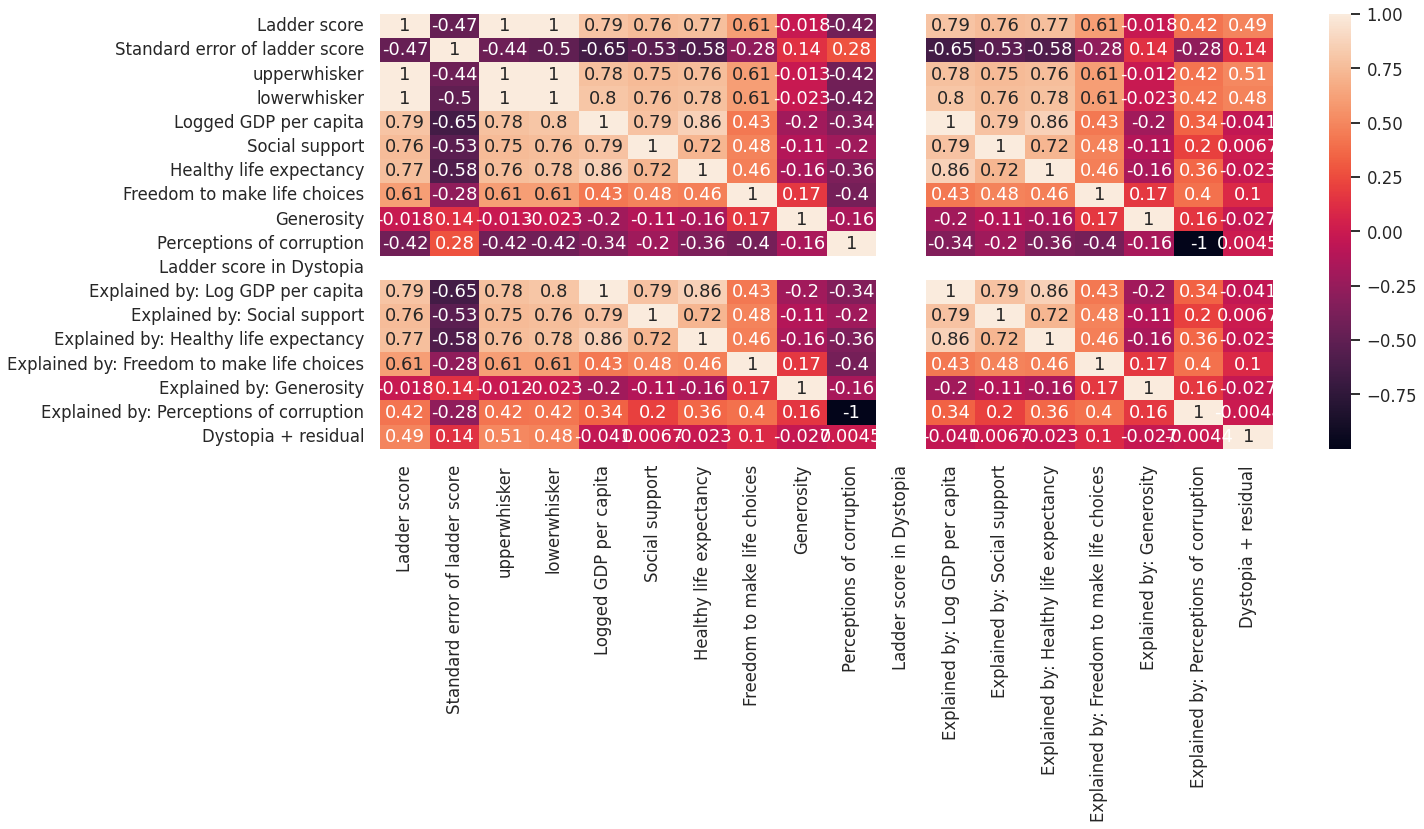

In [112]:
#correlation matrix 
plt.figure(figsize=(20, 8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

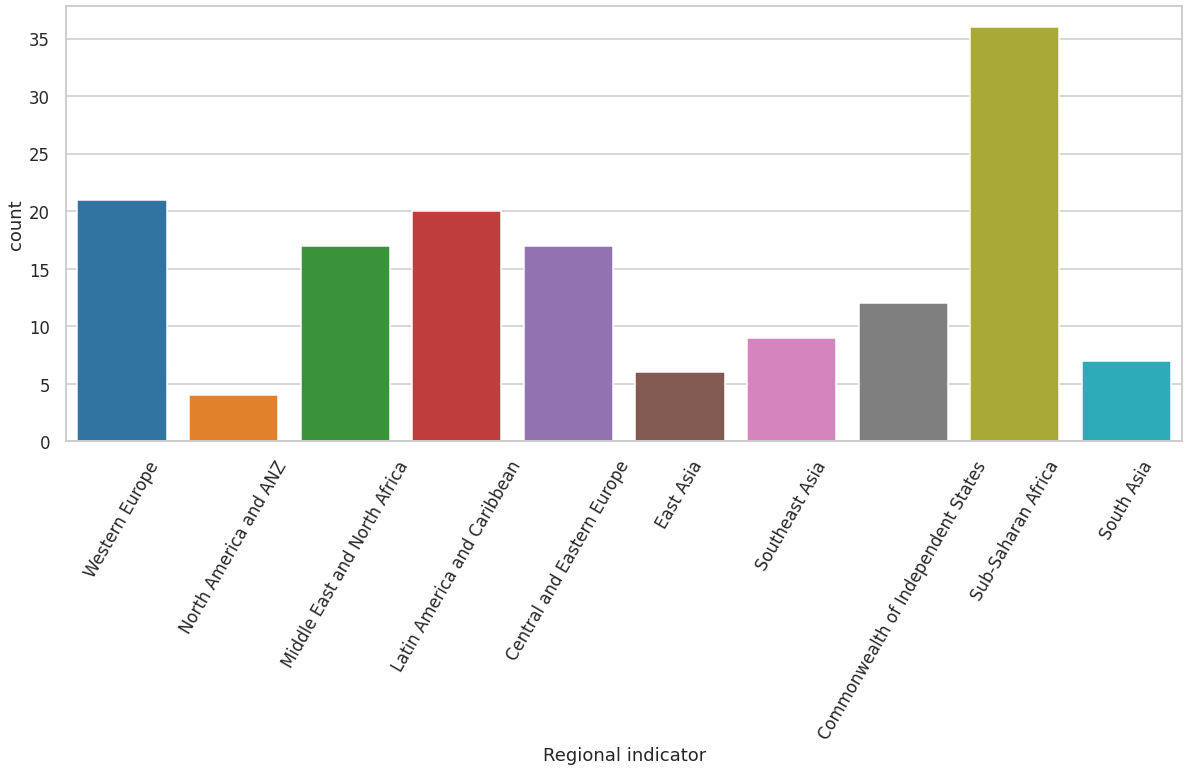

In [113]:
# count regional indicator
plt.figure(figsize=(20, 8)) #7gm el plot yb2a kber
sns.countplot(df["Regional indicator"])
plt.xticks(rotation = 60) #y3ml rotation ll names 3lshan med5losh fe b3d
plt.show()

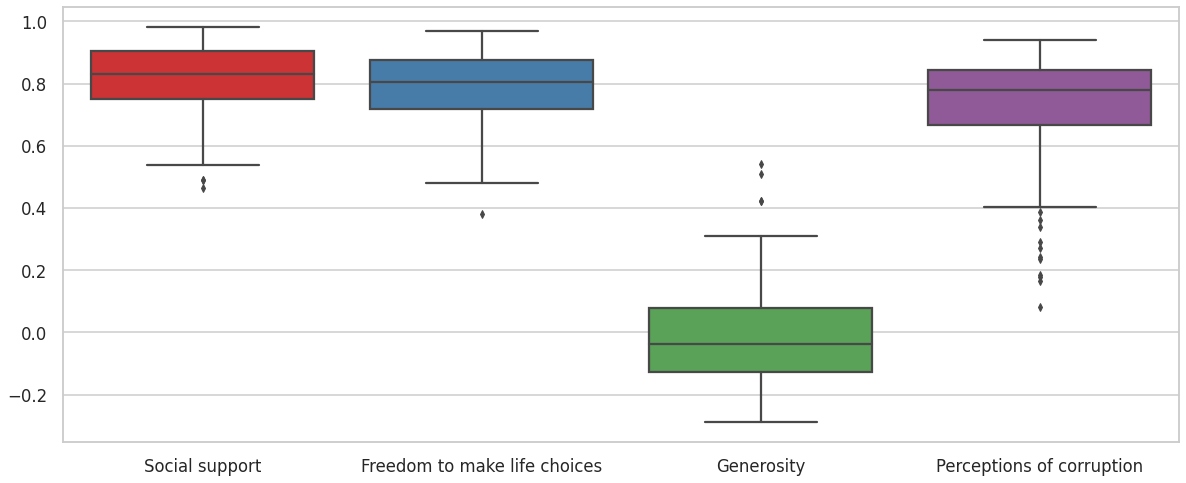

In [114]:
# distribution of features
plt.figure(figsize=(20, 8))
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"] # features elly 3ayz a7otha -1,1
sns.boxplot(data = df.loc[:, list_features], palette = "Set1") #palette de el color
plt.show()

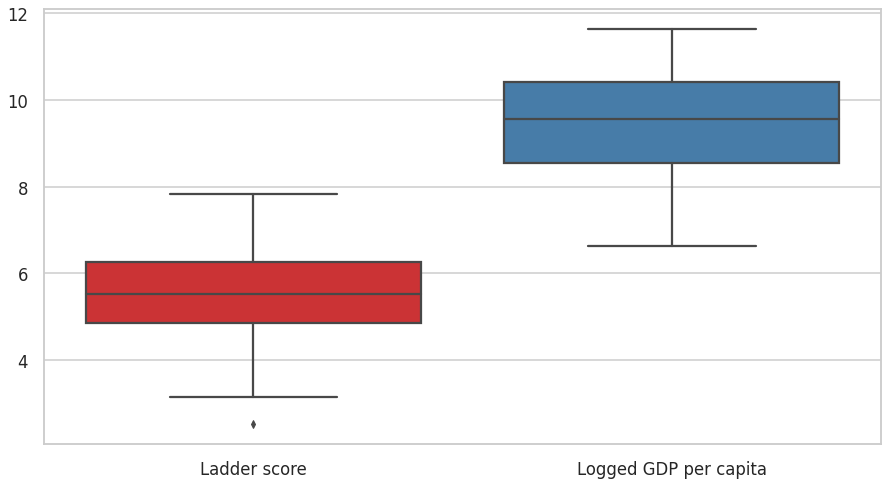

In [115]:
# distribution of feature set 2 , 3mlna wa7ed kman 3lshan range el arqam 
plt.figure(figsize=(15, 8))
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df.loc[:, list_features],palette = "Set1")
plt.show()

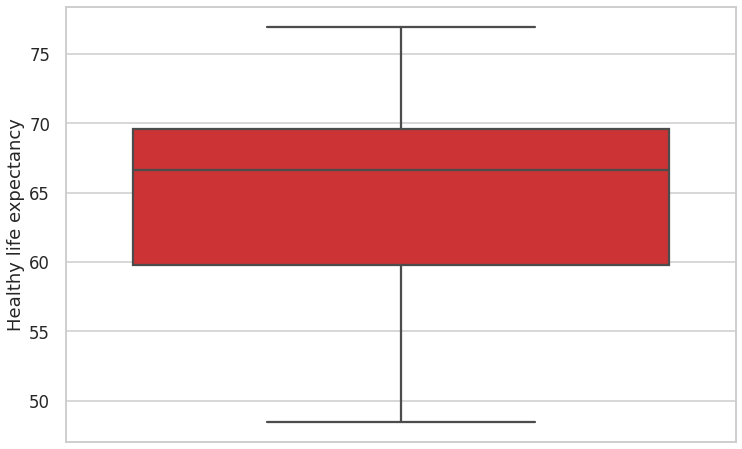

In [116]:
# distribution of helathy 
plt.figure(figsize=(12, 8))
sns.boxplot(data = df ,y="Healthy life expectancy", palette = "Set1")
plt.show()

<AxesSubplot:ylabel='Density'>

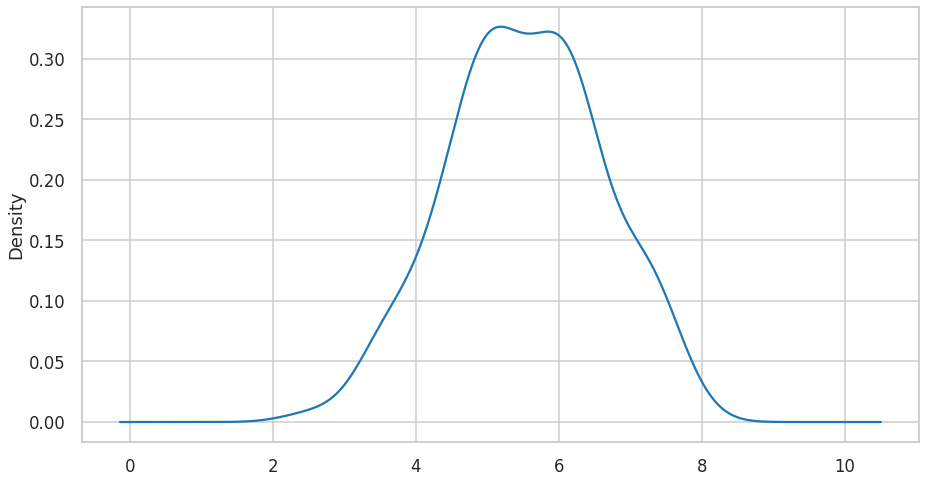

In [117]:
#probability of ladder score
plt.figure(figsize = (15,8))
df['Ladder score'].plot(kind='density')

array([[<AxesSubplot:title={'center':'Ladder score'}>,
        <AxesSubplot:title={'center':'Standard error of ladder score'}>,
        <AxesSubplot:title={'center':'upperwhisker'}>,
        <AxesSubplot:title={'center':'lowerwhisker'}>],
       [<AxesSubplot:title={'center':'Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'Ladder score in Dystopia'}>,
        <AxesSubplot:title={'center':'Explained by: Log GDP per capita'}>],
       [<AxesSubplot:title={'center':'Explained by: Social support'}>,
        <AxesSubplot:title={'center':'Explained by: Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Explained by: Freedom to make life choices'}>,
  

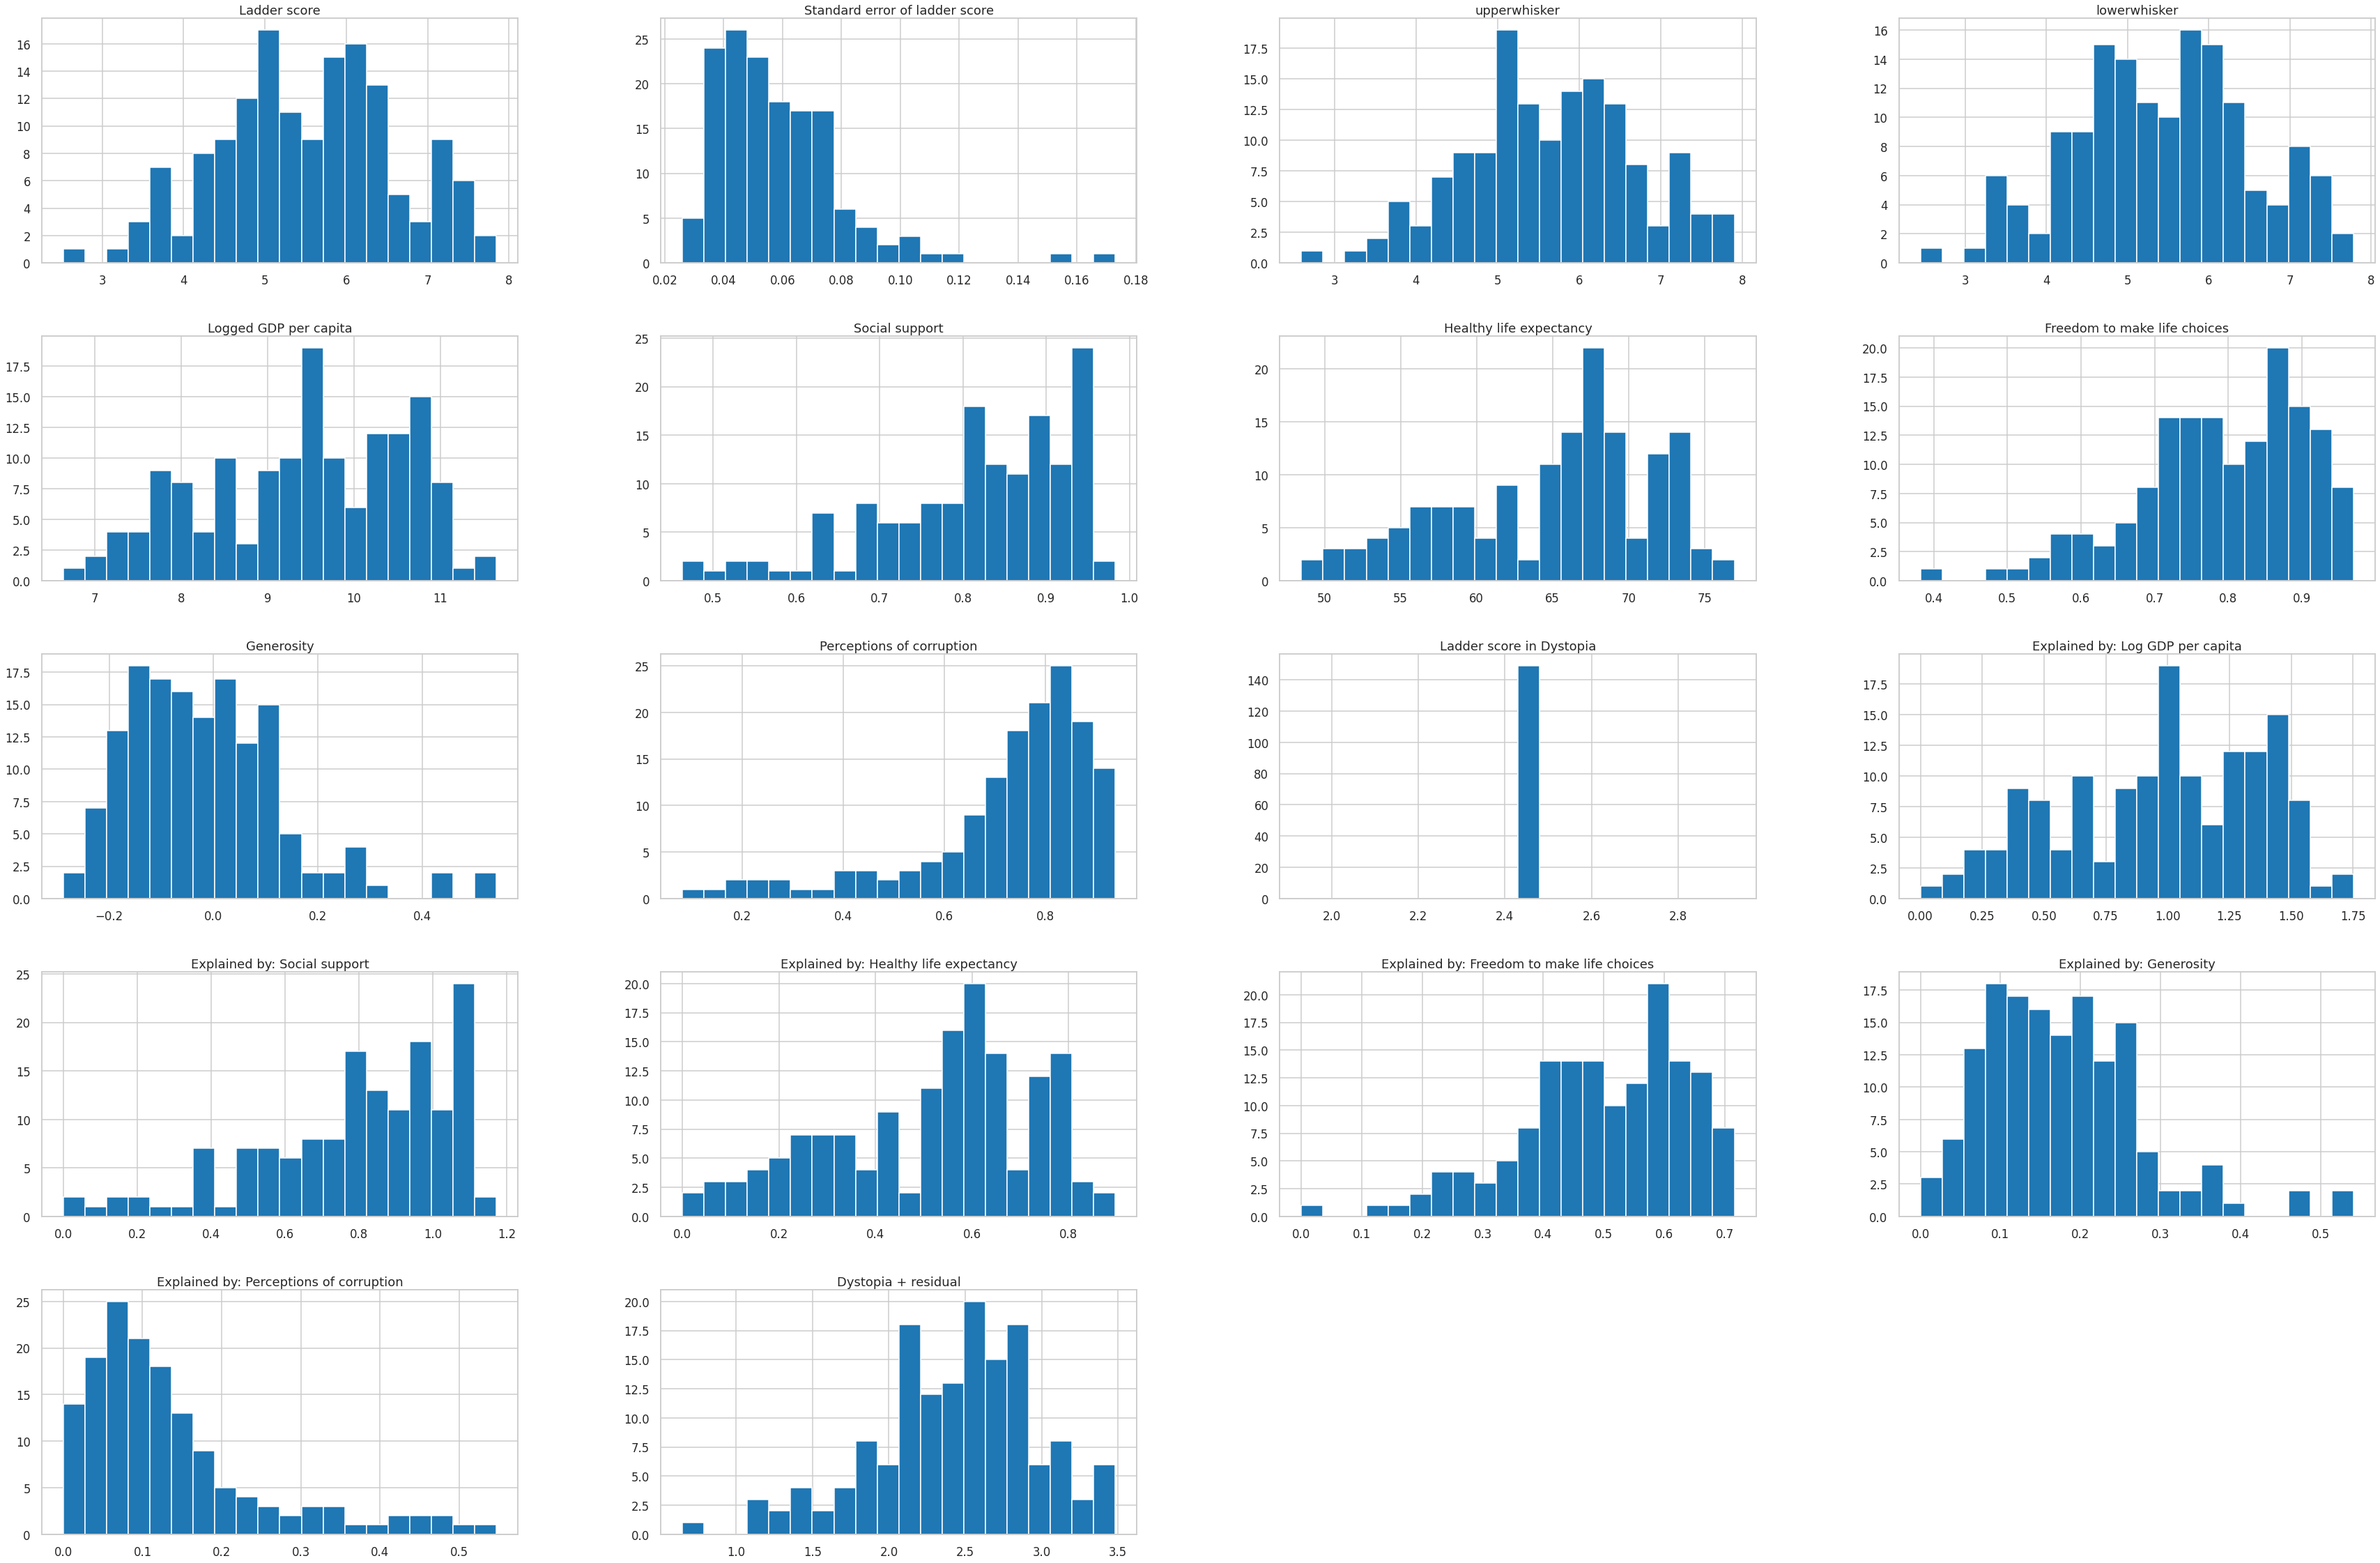

In [118]:
#hisotgram for all features
df.hist(bins=20, figsize=(60, 40))

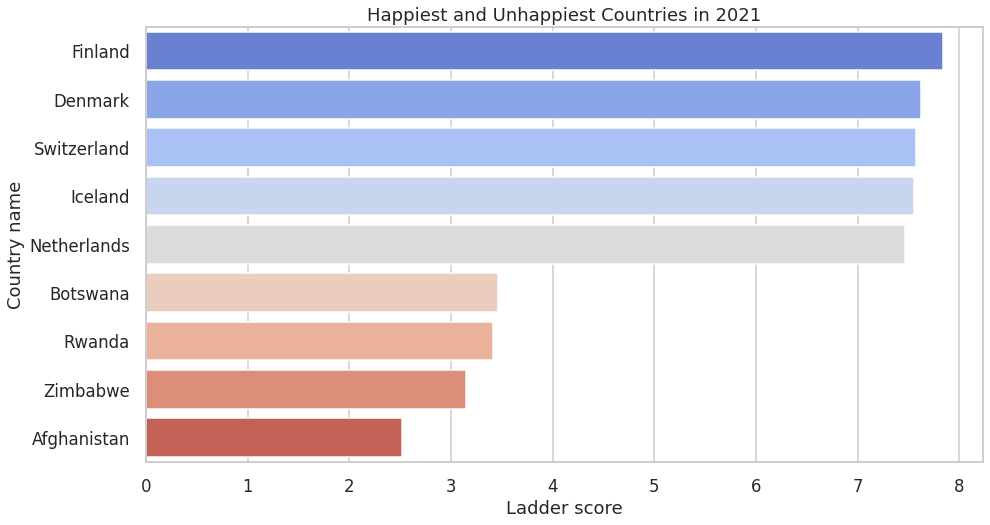

In [119]:
#aktr dol mabsota w 22l dol  , w 3rft el range from box plot 
plt.figure(figsize = (15,8))
happiest_unhappiest = df[(df.loc[:, "Ladder score"] > 7.4) | (df.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

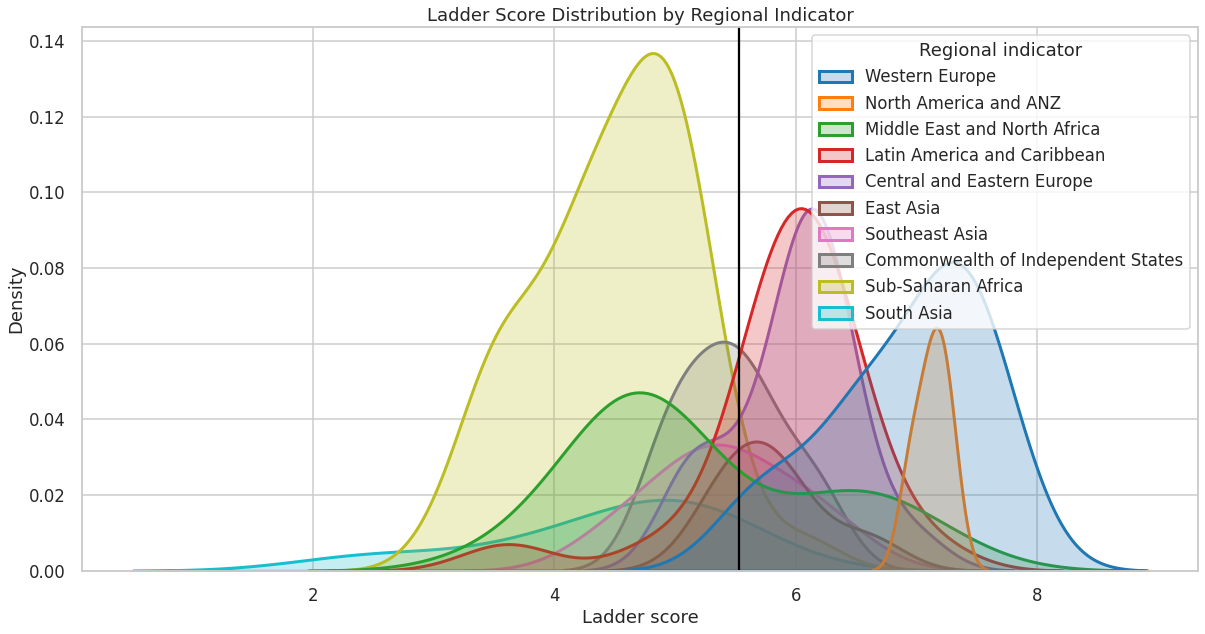

In [120]:
#distrbution of rageional by ladder 
plt.figure(figsize = (20,10))
sns.kdeplot(df["Ladder score"], hue = df["Regional indicator"], fill = True, linewidth = 3) #fill ylon elly gwa
plt.axvline(df["Ladder score"].mean(), c = "black") #line el mean 
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

In [175]:
fig = px.sunburst(df, path=['Regional indicator','Country name'], values='Ladder score',color='Freedom to make life choices', hover_data=['Social support'],  width=1000, height=800)
fig.show()

In [177]:
fig = px.treemap(df, path=['Regional indicator','Country name'], values='Ladder score',color='Freedom to make life choices', hover_data=['Social support'],  width=1000, height=800)
fig.show()

In [178]:
#happiest 10
fig = px.bar(df.nlargest(10, ['Ladder score']), x='Country name', y='Ladder score',
             hover_data=['Logged GDP per capita', 'Social support',"Healthy life expectancy","Freedom to make life choices"], color='Country name',
             labels={'pop':'population of Canada'},width=700,height=400)
fig.show()

In [179]:
#unhappiest 10 
fig = px.bar(df.nsmallest(10, ['Ladder score']), x='Country name', y='Ladder score',
             hover_data=['Logged GDP per capita', 'Social support',"Healthy life expectancy","Freedom to make life choices"], color='Country name',
             labels={'pop':'population of Canada'},width=700,height=400)
fig.show()

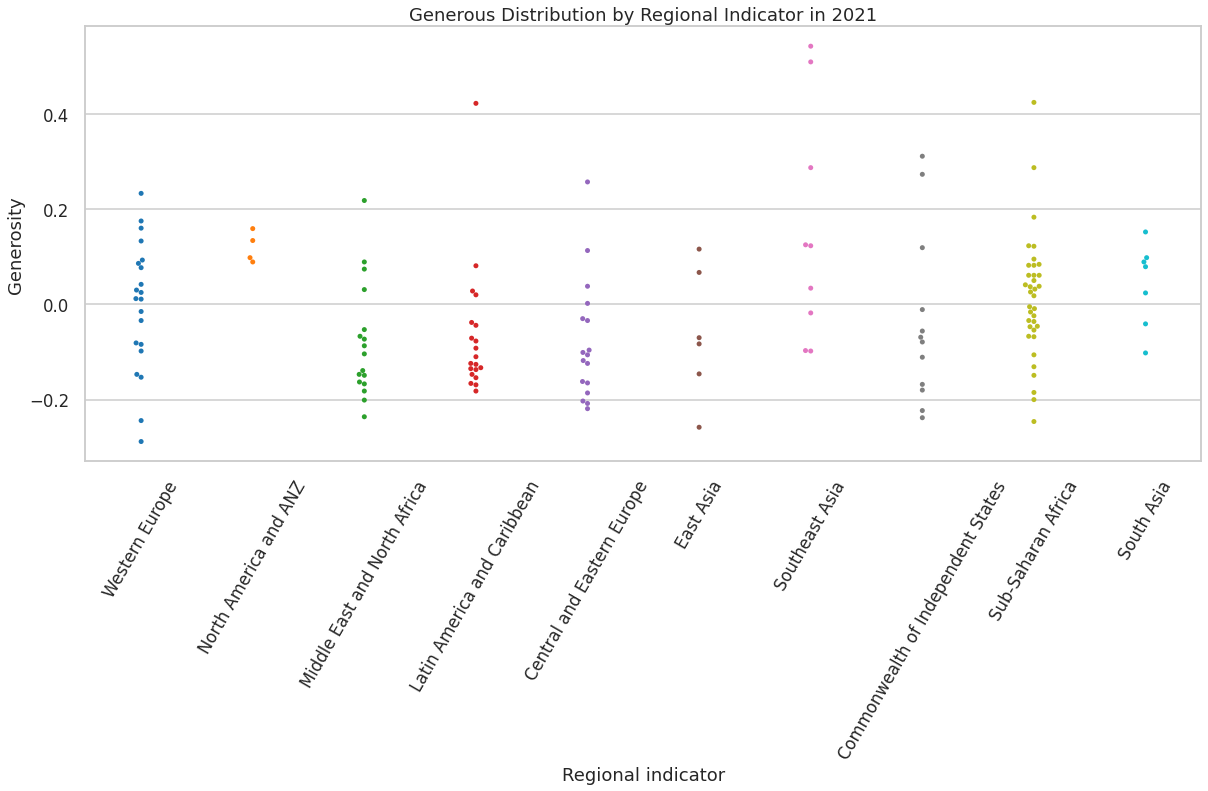

In [121]:
#swarmplot: draw a categorical scatterplot with non-overlapping points
plt.figure(figsize = (20,8))
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df)
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

## data set 2 

In [122]:
df1.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [180]:
#check miss value
df1.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [181]:
df1=df1.dropna(axis=0)

In [182]:
df1.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [190]:
df1.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000
mean,2013.289227,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
std,4.073657,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000
25%,2010.000000,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000
50%,2013.000000,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
75%,2017.000000,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250
max,2020.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000


0.7928483956934599

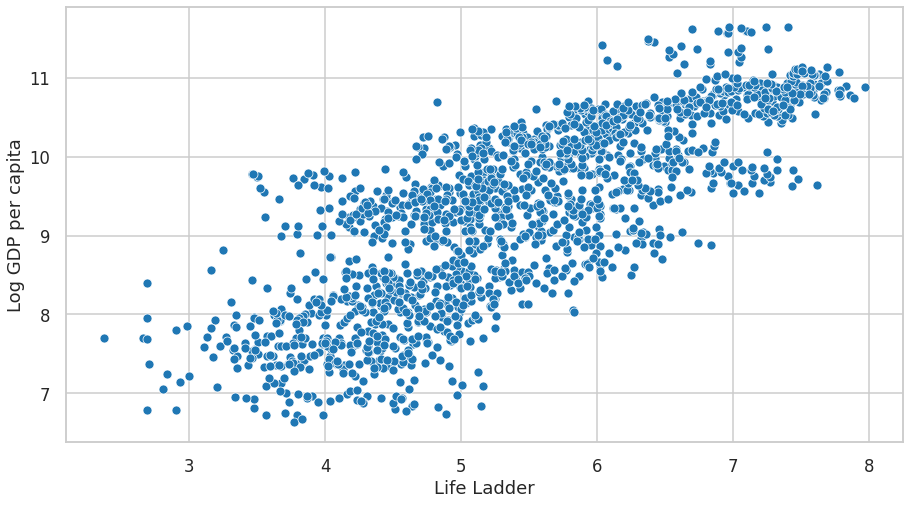

In [183]:
#realtion between Life Ladde and Log GDP per capita  solid 
plt.figure(figsize=(15, 8))

sns.scatterplot(data=df1, x='Life Ladder', y='Log GDP per capita')

df1['Life Ladder'].corr(df1['Log GDP per capita'])

In [184]:
#realtion between Life Ladde and Log GDP per capita  interactive 
fig = px.scatter(df1, x = "Log GDP per capita",y = "Life Ladder")
fig.show()

In [185]:
#animation and intrative 
#relationship between happiness and fredoom 
fig = px.scatter(df1, 
                 x = "Log GDP per capita",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 template = "plotly_dark",
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig.show()

In [186]:
df_year_Lader = df1.groupby(['year' , 'Life Ladder','Country name'])
df_year_Lader.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [187]:
#Relationship Between Happiness and Corruption
fig = px.scatter(df1, 
                 x = "Perceptions of corruption",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 template = "plotly_white",
                 size = "Life Ladder",
                 color = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Life Ladder and Corruption Comparison by Countries via Regions for each Year")
fig.show()

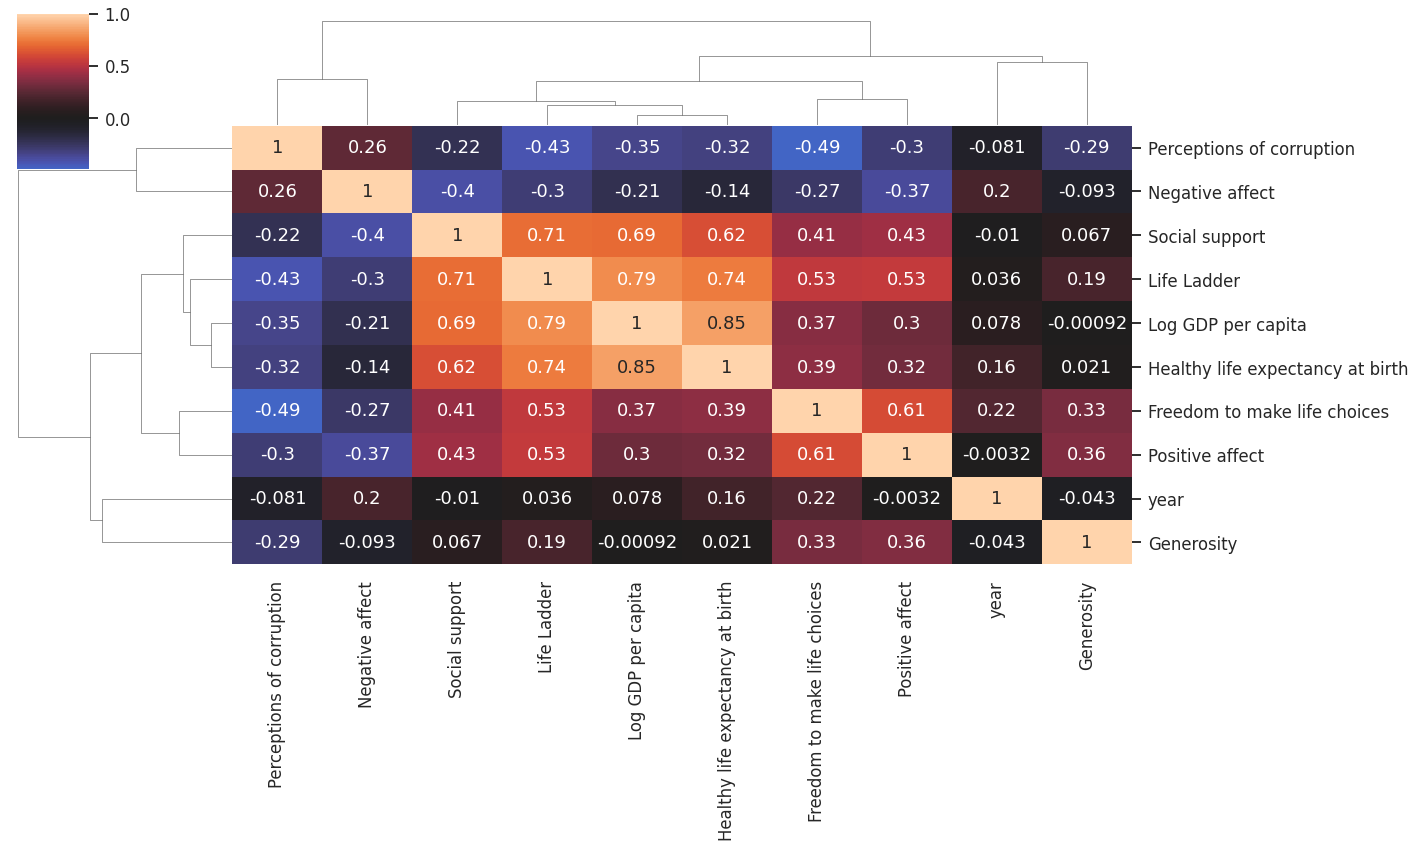

In [127]:
#cluser heat map 
sns.clustermap(df1.corr(), center = 0, annot = True, figsize=(20,12))
plt.show()

In [128]:
#choropleth map by life ladder 
fig = px.choropleth(df1.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

In [205]:
df_g=df1.groupby(['year']).sum()

In [206]:
df_g.head(5)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,7.418,10.652,0.962,71.300,0.957,0.256,0.503,0.839,0.233
2006,384.774,671.484,61.845,4437.280,53.857,0.035,56.287,53.173,18.968
2007,506.261,860.350,76.040,5751.712,64.515,1.088,74.817,66.425,23.351
2008,549.853,924.295,79.031,6176.815,69.116,2.603,77.561,71.312,24.505
2009,578.259,981.101,86.467,6602.541,72.464,-1.212,81.651,74.592,26.587


In [215]:
#happiness over years 
fig = px.line(df_g, y="Life Ladder")
fig.show()
#max year 2017